In [6]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom
import arviz as az

In [9]:
y = [0, 5, 10]
thetas = [0.2, 0.5]

posterior_results = {}
predictive_results = {}

for theta in thetas:
    for Y in y:
        print(f"Y={Y}, Theta={theta}")

        with pm.Model() as model:

            n = pm.Poisson("n", mu=10)

            y_obs = pm.Binomial("Y_obs", n=n, p=theta, observed=Y)

            y_future = pm.Binomial("Y_future", n=n, p=theta)

            step = pm.Metropolis(vars=[n])

            trace = pm.sample(
                draws=8000,
                tune=2000,
                cores=1,
                chains=2,
                step=step,
                progressbar=True
            )

            ppc = pm.sample_posterior_predictive(
                trace,
                var_names=["Y_future"],
                random_seed=42
            )

        posterior_results[(Y, theta)] = trace
        predictive_results[(Y, theta)] = (
            ppc.posterior_predictive["Y_future"].values.flatten()
        )


Y=0, Theta=0.2


Output()

Output()

Y=5, Theta=0.2


Output()

Output()

Y=10, Theta=0.2


Output()

Output()

Y=0, Theta=0.5


Output()

Output()

Y=5, Theta=0.5


Output()

Output()

Y=10, Theta=0.5


Output()

Output()

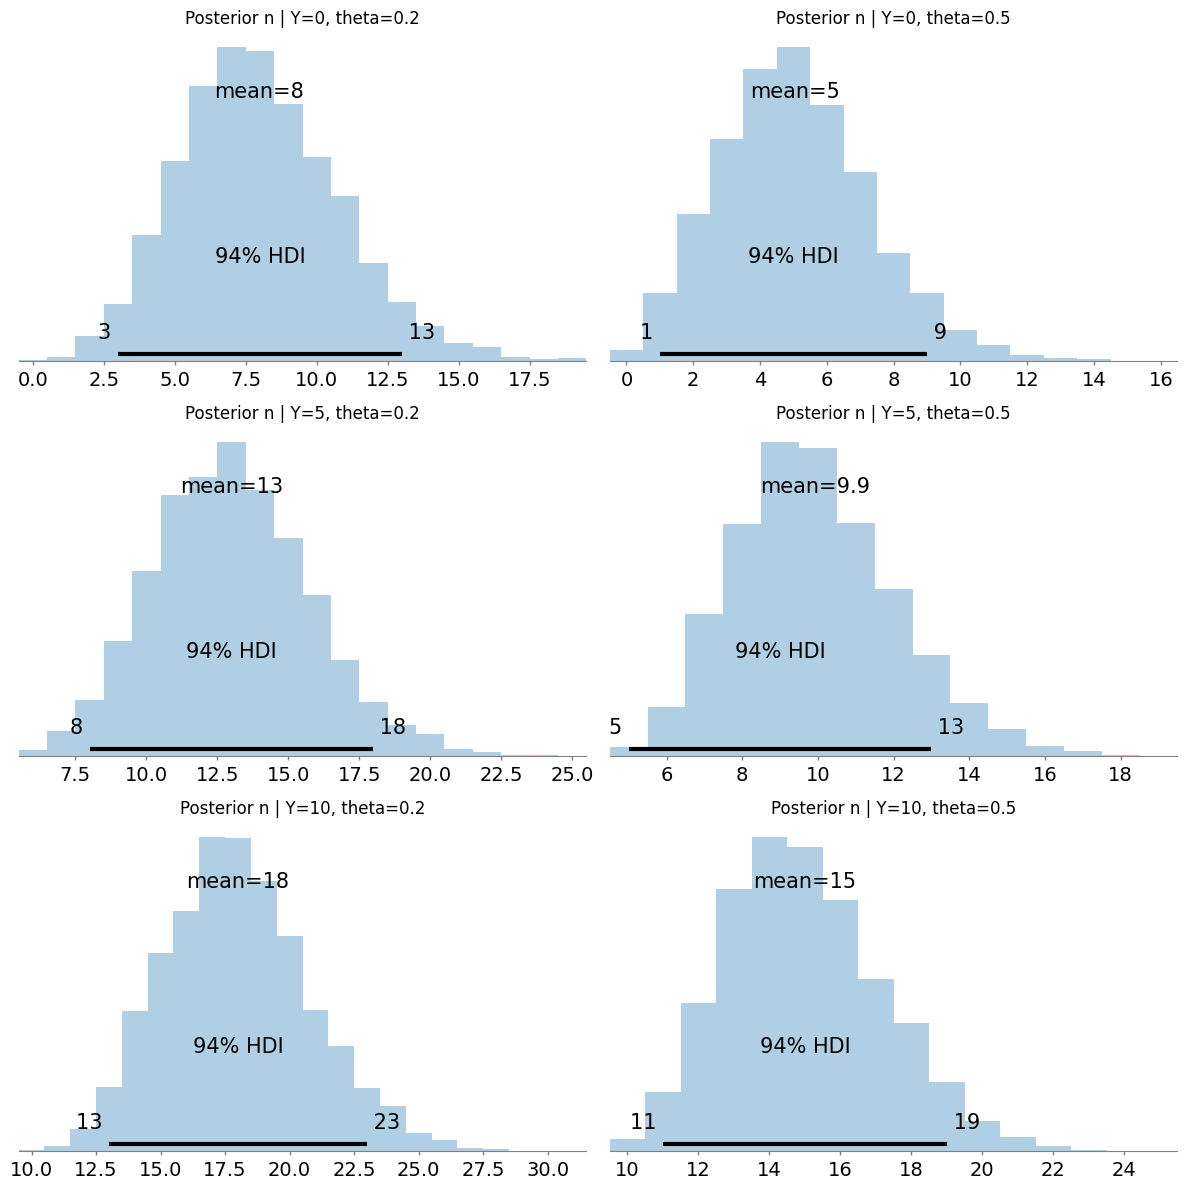

In [11]:
#Vizualizare posterior
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, Y in enumerate(y):
    for j, theta in enumerate(thetas):
        ax = axes[i, j]
        trace = posterior_results[(Y, theta)]
        az.plot_posterior(trace, var_names=["n"], ax=ax)
        ax.set_title(f"Posterior n | Y={Y}, theta={theta}")

plt.tight_layout()
plt.show()


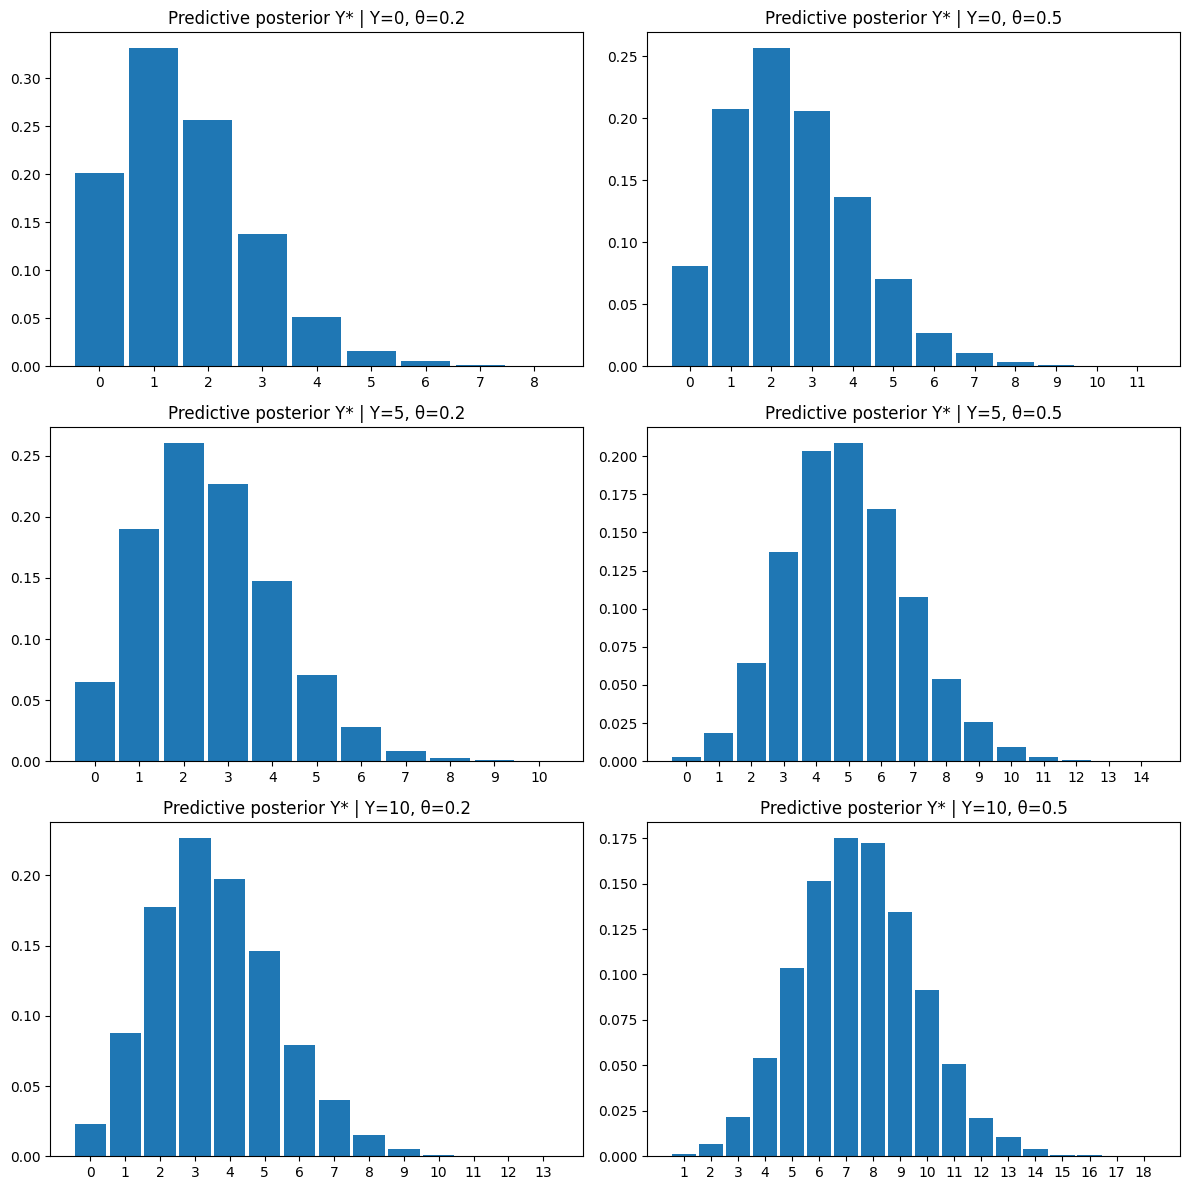

In [12]:
#vizualizare posterior predictiv
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, Y in enumerate(y):
    for j, theta in enumerate(thetas):
        ax = axes[i, j]
        samples = predictive_results[(Y, theta)]
        az.plot_dist(samples, ax=ax, kind="hist")
        ax.set_title(f"Predictive posterior Y* | Y={Y}, θ={theta}")

plt.tight_layout()
plt.show()
